## Customer Analysis 

Goals:
- Targeted marketing (Efficient campaign for specific product)
- Increase stock on best seller products
- Increase sales by bundling best seller products with dead stock products
- Increase customer satisfaction

### Load libs

In [347]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.calibration import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split

### Load Data

In [348]:
df = pd.read_csv("dataset/marketing_campaign.csv",sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Exploratory Data Analysis 

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [350]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [351]:
# Identify duplicate rows
duplicates = df.duplicated()
print(duplicates)

# Drop duplicate rows
df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Delete rows with missing value
df = df.dropna()
deleted_missing_values  = df.isnull().sum()
print(deleted_missing_values)


0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
ID                     0
Year_Birth             0
Edu

In [352]:
print(df.info())

# 3 data not numerical , if needed we will use label encoding

# Remove id
df = df.drop('ID', axis=1)
# Remove education coz not relevant
df = df.drop('Education', axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


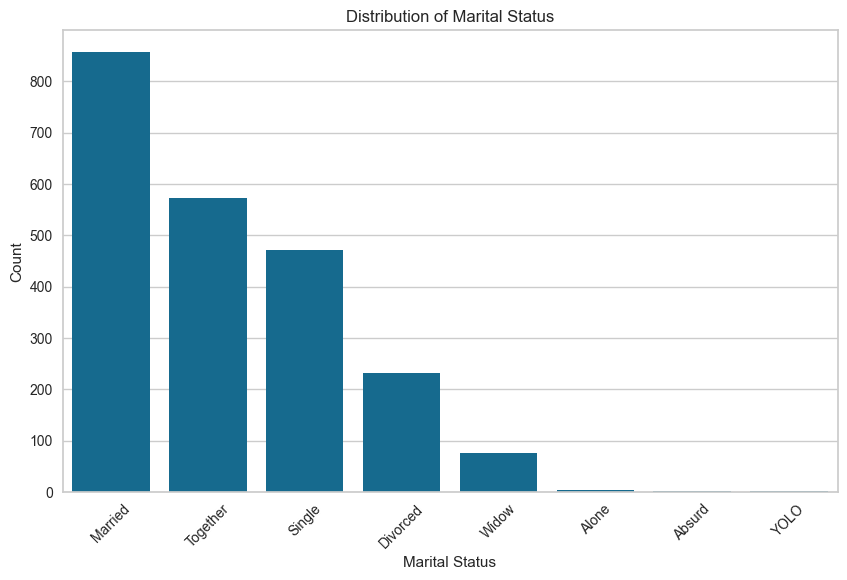

In [353]:
marital_status_counts = df['Marital_Status'].value_counts()
print(marital_status_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, order=marital_status_counts.index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Marital_Status
Married    1430
Single      786
Name: count, dtype: int64


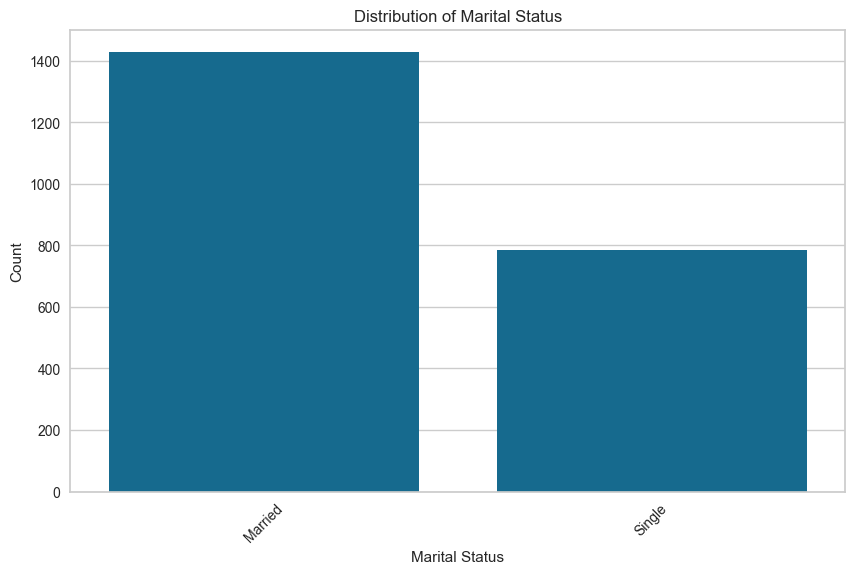

In [354]:

# Transform unusual marital status (Absurd,Alone,YOLO , Widow,Divorced to Single)
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO','Widow','Divorced'], 'Single')
# Transform Together to Married
df['Marital_Status'] = df['Marital_Status'].replace(['Together'], 'Married')
# Show the newest marital status
marital_status_counts = df['Marital_Status'].value_counts()
print(marital_status_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, order=marital_status_counts.index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [355]:
# Remove Dt_Customer , since we dont want to categorize "loyal" customer yet
df = df.drop(columns=['Dt_Customer'])
df.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,1954,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,1965,Married,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,1984,Married,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,1981,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [356]:
# Encode Marital_Status using label encoding
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,1,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,1954,1,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,1965,0,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,1984,0,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,1981,0,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [357]:
# Set numeric columns for correlation and feature distribution (No need since all categorical data is already encoded and deleted)
# numeric_columns = list(df.select_dtypes(include=['number']))
# print(df.head())

In [358]:
# Drop marital status
df = df.drop(columns=['Marital_Status'])
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0


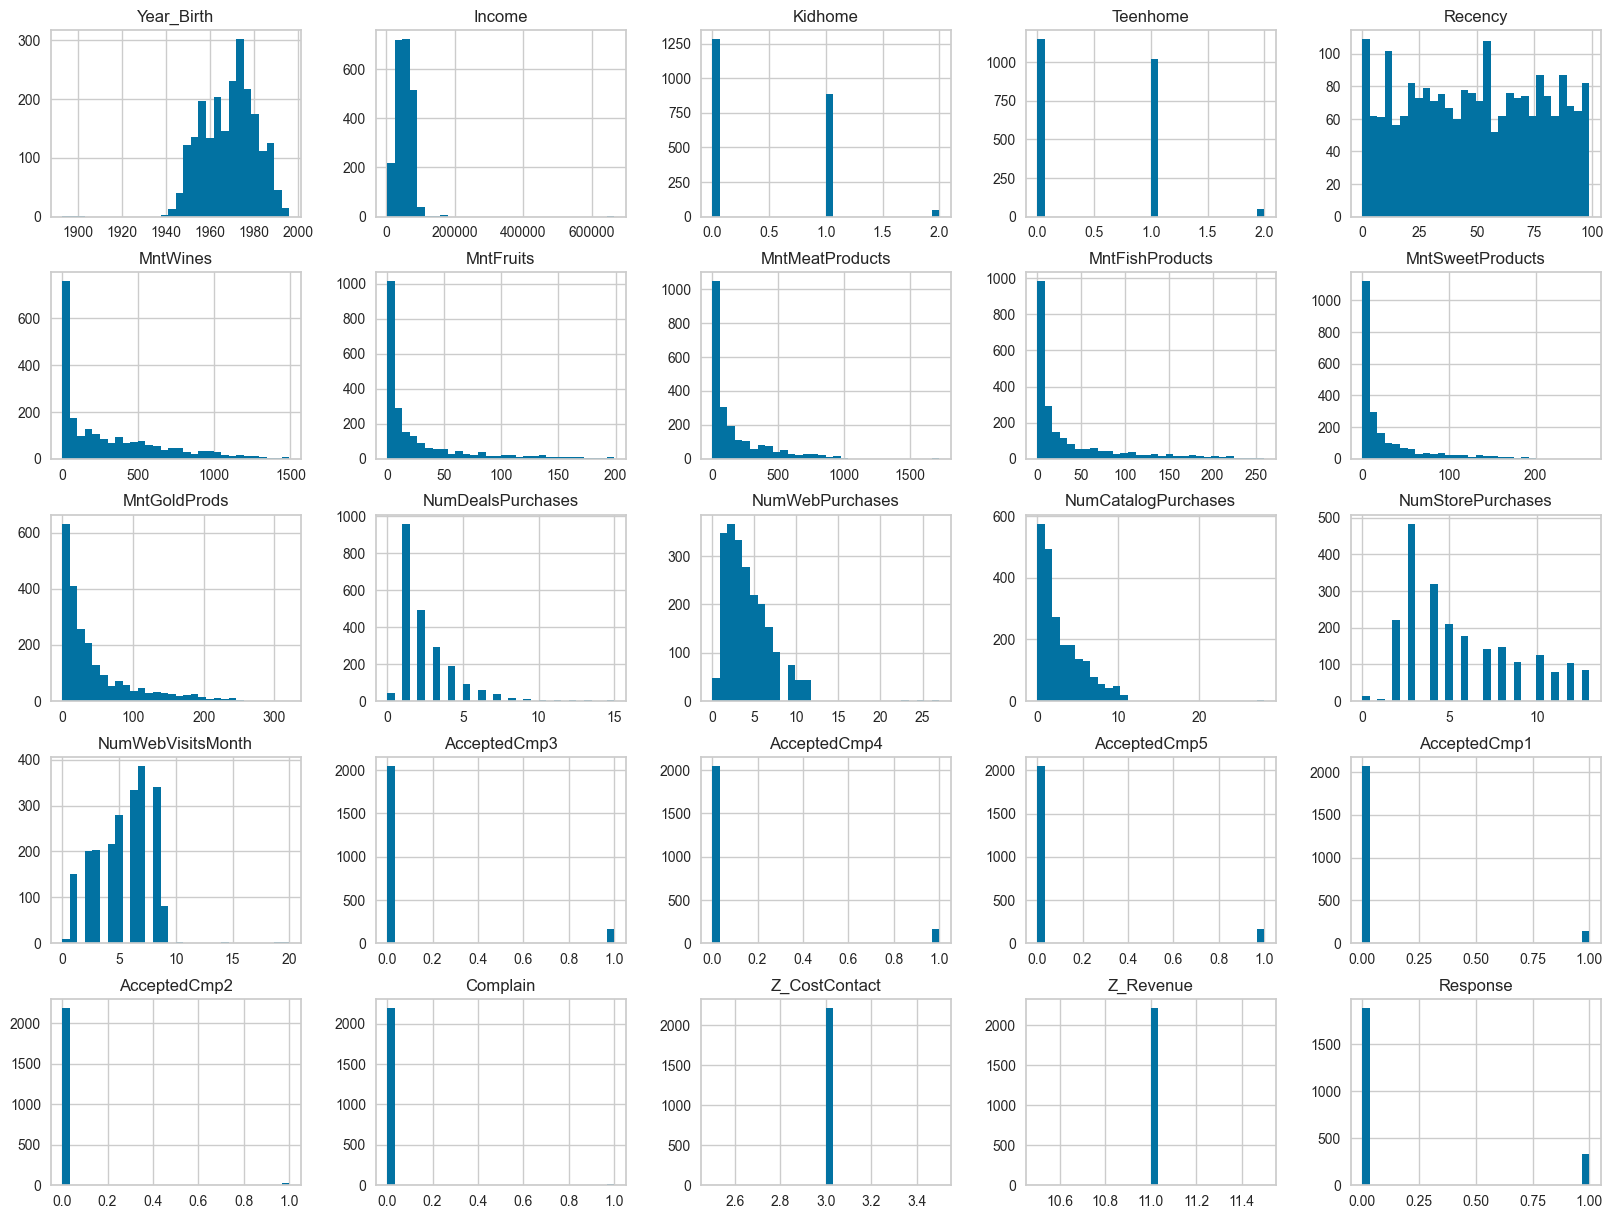

In [359]:
# Plot each vars using numeric columns
df.hist(bins=30, figsize=(20,15))
plt.show()

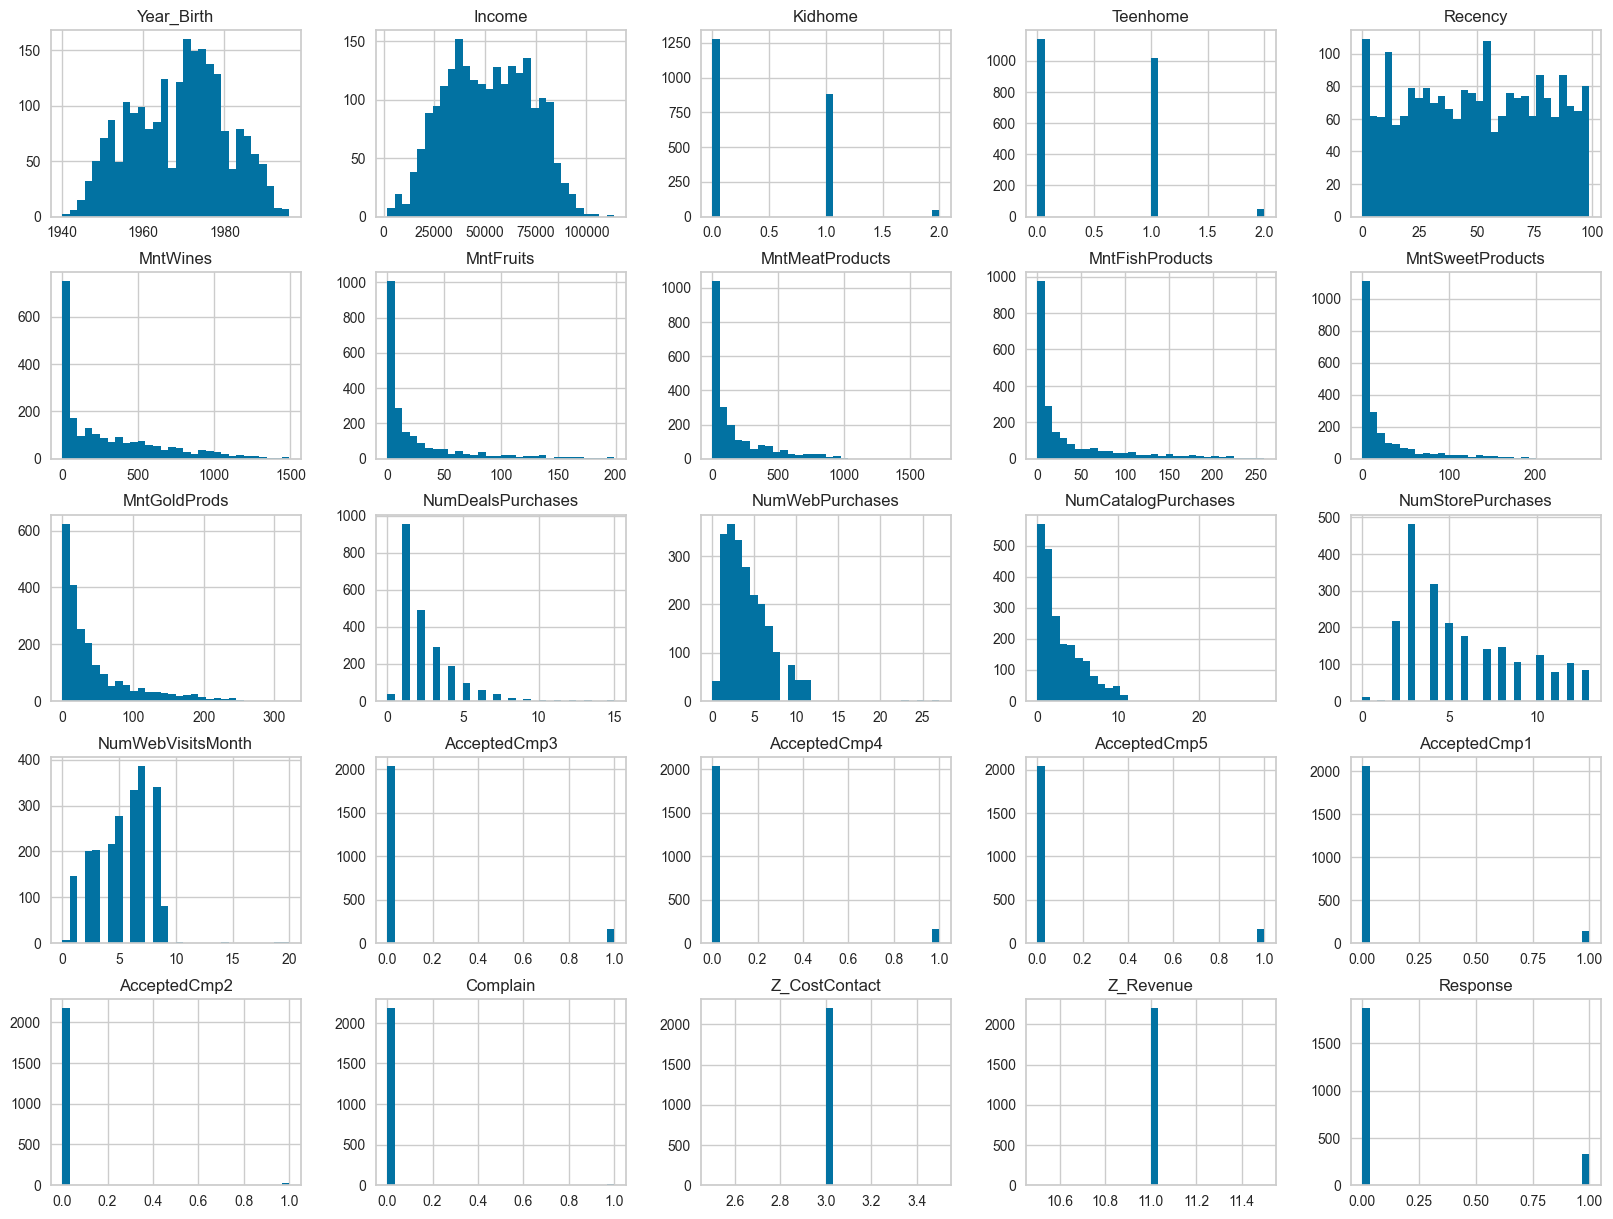

In [360]:
# Use income & Year_Birth as relevant features
df_cleaned = df.copy()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df_cleaned, 'Income') # remove outliers from income
df_cleaned = remove_outliers(df_cleaned, 'Year_Birth') # remove outliers from Year_Birth
# Plot each vars
df_cleaned.hist(bins=30, figsize=(20,15))
plt.show()


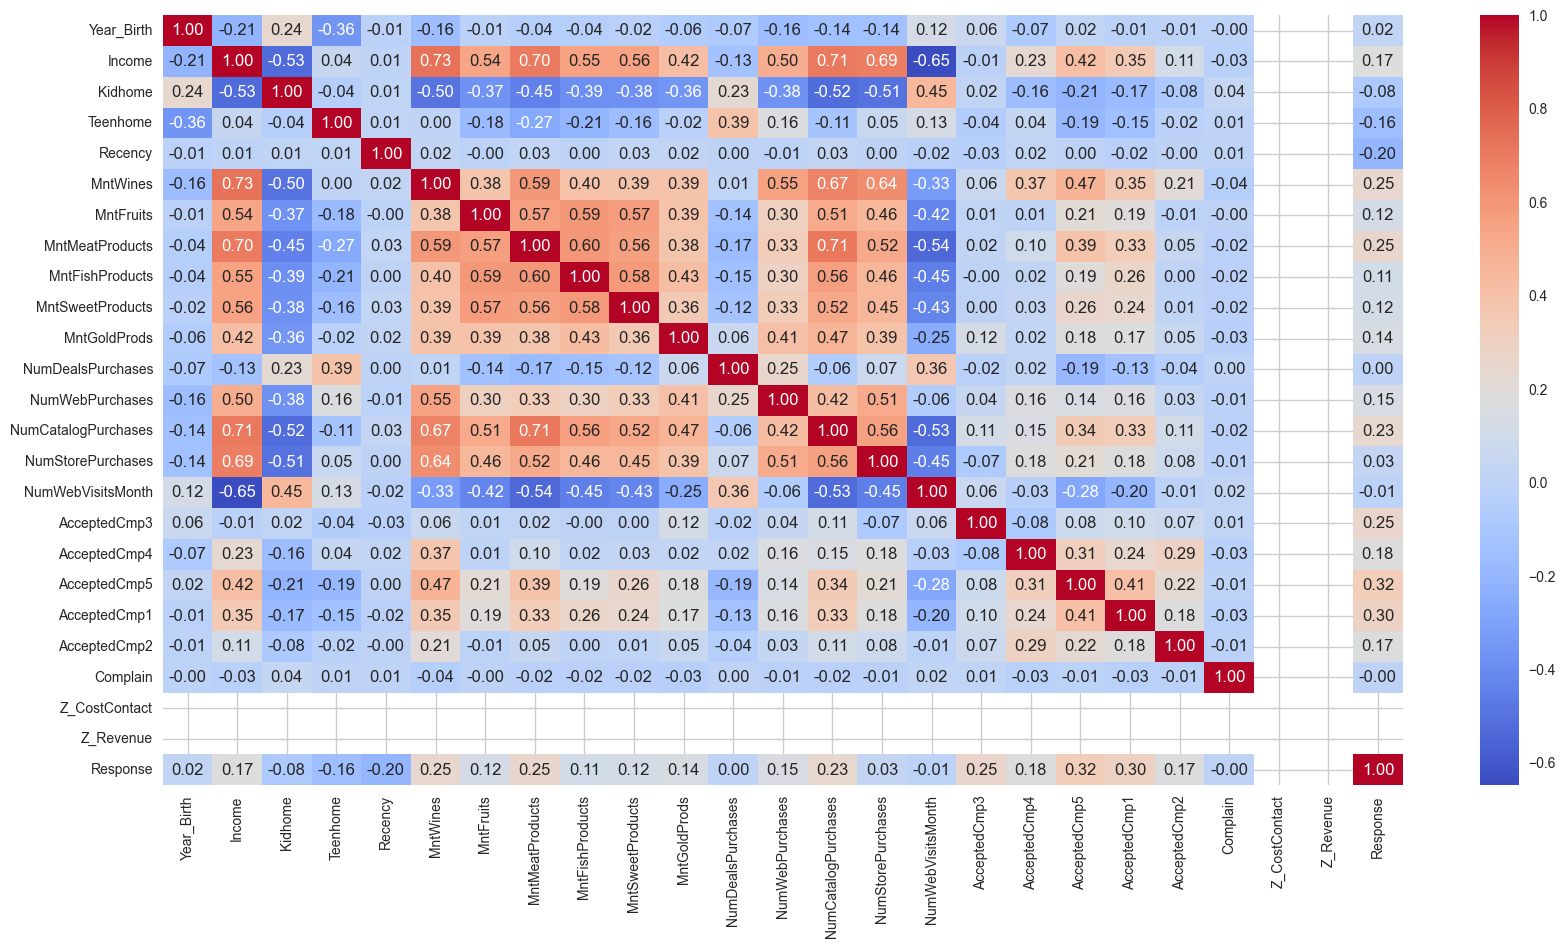

In [361]:
# Generate plot correlation matrix between features

correlation_matrix = df_cleaned.corr() # calculate correlation matrix

plt.figure(figsize=(20, 10)) # set figure size
sns.heatmap(correlation_matrix,fmt=".2f", annot=True, cmap='coolwarm') # generate heatmap
plt.show() # display plot

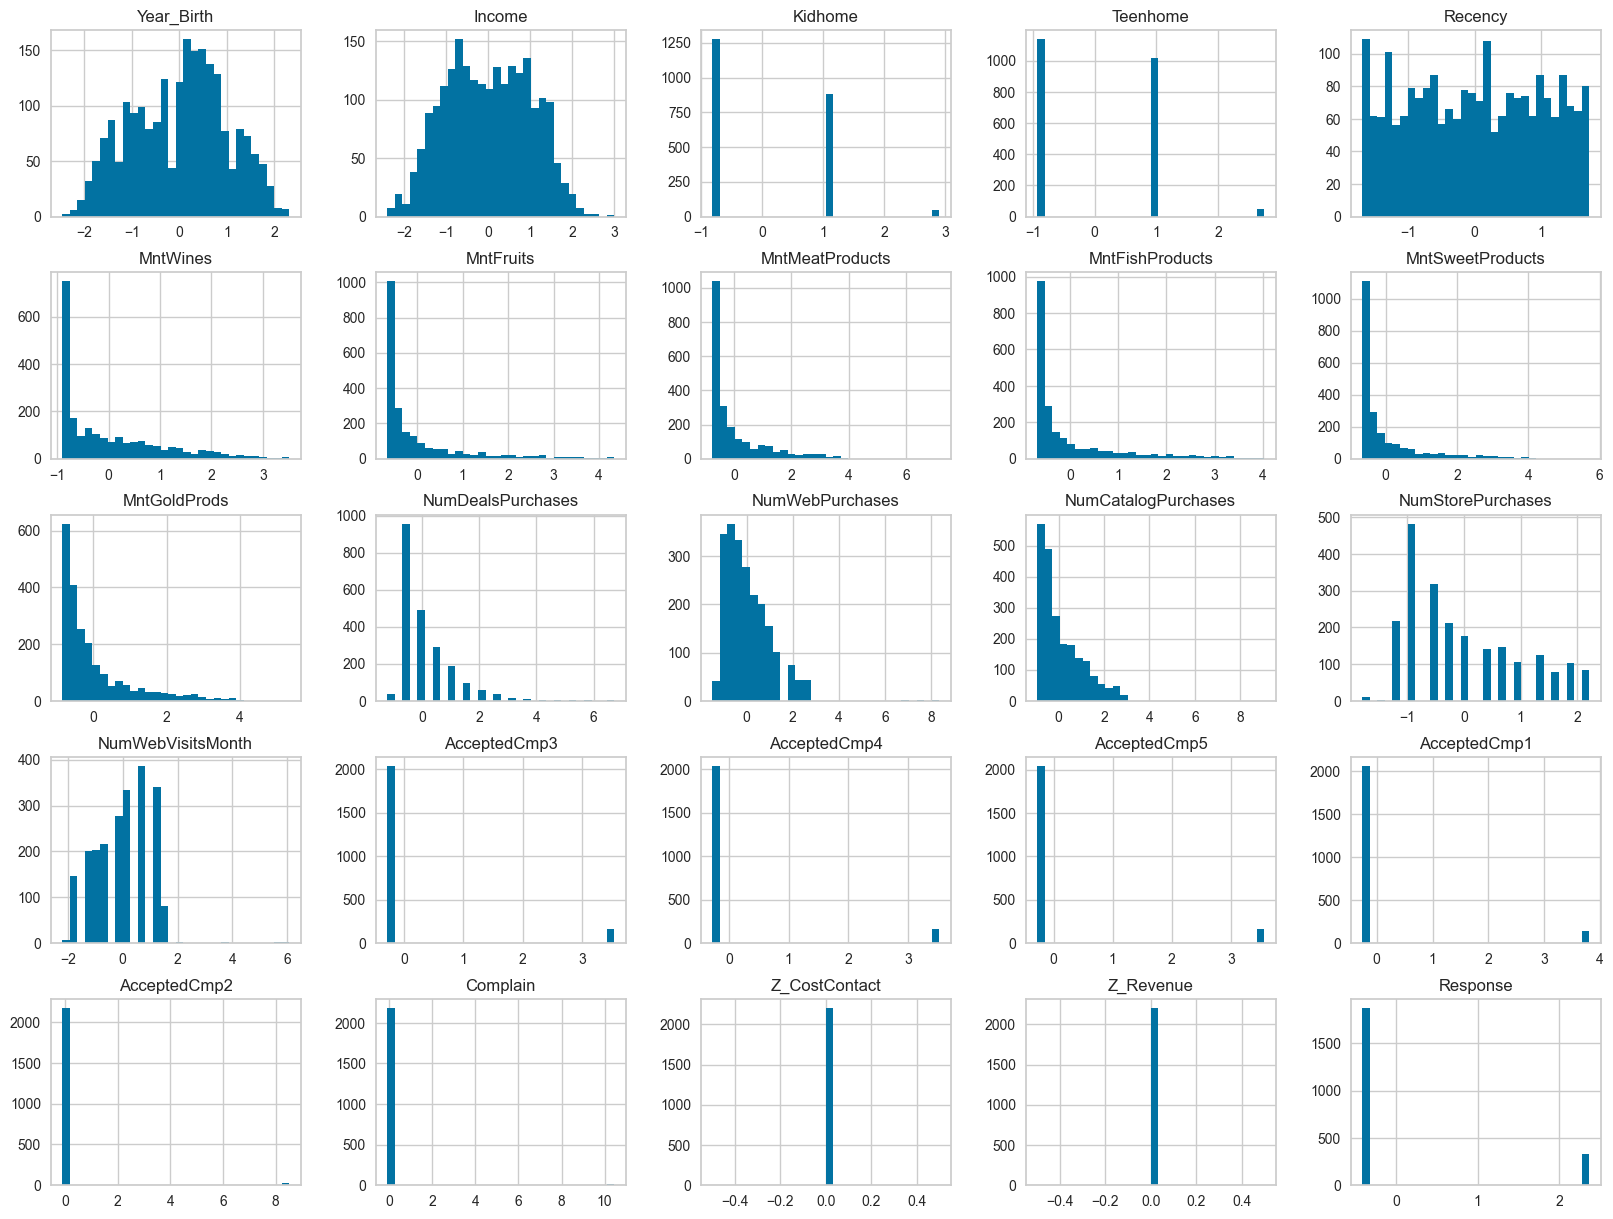

In [362]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned) # scale data
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns) # convert to dataframe

df_scaled.hist(bins=30, figsize=(20,15))
plt.show()

In [382]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,3.799700,-0.088040,-0.310105
1,-2.365419,0.265397,-0.200179
2,1.694669,0.128460,-1.070986
3,-2.623582,-1.432275,-0.050782
4,-0.425380,-0.120084,-0.670895


The optimal number of clusters is 4


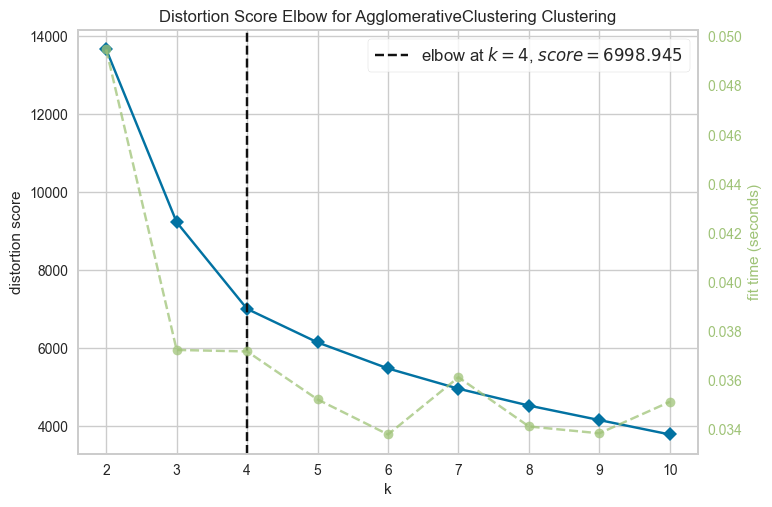

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [383]:
visualizer = KElbowVisualizer(AgglomerativeClustering())
visualizer.fit(df_pca)

optimal_k = visualizer.elbow_value_
print(f"The optimal number of clusters is {optimal_k}")

visualizer.show()


In [381]:
clustering_alg = AgglomerativeClustering(n_clusters=2,linkage='average')
df_cleaned['Cluster'] = clustering_alg.fit_predict(df_pca)

df_cleaned.head()
df_cleaned['Cluster'].value_counts()

silhouette_avg = silhouette_score(df_scaled, df_cleaned['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.27875069998256335


In [298]:
cluster_analysis = df_cleaned.groupby('Cluster').mean()
cluster_analysis

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1968.133333,71054.833333,0.066667,0.433333,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,...,5.166667,0.233333,0.733333,0.566667,0.433333,1.0,0.000000,3.0,11.0,0.666667
1,1964.176744,58108.928682,0.220155,0.911628,48.832558,440.682171,22.961240,133.835659,31.125581,23.734884,...,5.559690,0.057364,0.120930,0.012403,0.026357,0.0,0.009302,3.0,11.0,0.093023
2,1968.719626,75978.368224,0.041121,0.162617,49.444860,606.586916,70.727103,463.071028,103.013084,72.242991,...,2.807477,0.082243,0.104673,0.254206,0.207477,0.0,0.003738,3.0,11.0,0.289720
3,1972.091457,33735.063317,0.813065,0.431156,48.899497,39.566834,4.905528,23.052261,6.937688,4.965829,...,6.557789,0.075377,0.008040,0.000000,0.001005,0.0,0.012060,3.0,11.0,0.098492


### Remove dimensionality of data to improve score

In [300]:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
# df_pca['Cluster'] = df_cleaned['Cluster']
# df_pca.head()

,PC1,PC2,Cluster
0,3.799700,-0.088040,2.0
1,-2.365419,0.265397,3.0
2,1.694669,0.128460,1.0
3,-2.623582,-1.432275,3.0
4,-0.425380,-0.120084,1.0


In [376]:
# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>

In [ ]:
clustering_alg = AgglomerativeClustering(n_clusters=2,linkage='average')
df_cleaned['Cluster'] = clustering_alg.fit_predict(df_scaled)

#  Analyze clusters
cluster_analysis = df_cleaned.groupby('Cluster').mean()
print(cluster_analysis)

silhouette_avg = silhouette_score(df_scaled, df_cleaned['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

          Year_Birth        Income   Kidhome  Teenhome   Recency    MntWines  \
Cluster                                                                        
0        1968.899728  51644.406534  0.441924  0.506806  49.01225  306.303085   
1        1979.000000   2447.000000  1.000000  0.000000  42.00000    1.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        26.414701       164.604356         37.77314           27.1402  ...   
1         1.000000      1725.000000          1.00000            1.0000  ...   

         NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                
0                 5.338929      0.073956       0.07441      0.073049   
1                 1.000000      0.000000       0.00000      0.000000   

         AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  